In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import joblib

In [4]:
#Load the dataset:
df = pd.read_csv(r"C:\Users\Vikram\Documents\UCD\Spring\Team Project\Data\train_data.csv")
df

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,...,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0,1,...,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,...,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,...,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7,19,...,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15,9,...,0.0,0.0,0.044237,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,5473.json,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0,1,...,-0.6,0.6,0.354176,0.290966,0.020772,0.176219,0.216899,_1054_,"[1, 0]",_NEG_
10232,3408.json,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0,0,...,0.0,0.0,0.189920,0.077568,0.050404,0.196092,0.410885,_2910_,"[1, 0]",NaN
10233,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4,11,...,-0.4,0.4,0.119778,0.206043,0.152902,0.095003,0.220693,_540_,"[0, 1]",_NEG_
10234,2253.json,FALSE,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3,1,...,0.0,0.0,0.113820,0.066778,0.312947,0.242768,0.084354,_376_,"[0, 1]",NaN


#### Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10236 entries, 0 to 10235
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    10236 non-null  object 
 1   label                 10236 non-null  object 
 2   statement             10236 non-null  object 
 3   subject               10236 non-null  object 
 4   speaker               10236 non-null  object 
 5   speaker_job           7342 non-null   object 
 6   state_info            8030 non-null   object 
 7   party_affiliation     10236 non-null  object 
 8   barely_true_counts    10236 non-null  int64  
 9   false_counts          10236 non-null  int64  
 10  half_true_counts      10236 non-null  int64  
 11  mostly_true_counts    10236 non-null  int64  
 12  pants_on_fire_counts  10236 non-null  int64  
 13  context               10136 non-null  object 
 14  sentiment             8848 non-null   object 
 15  sentiment_score    

C:\Users\Vikram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


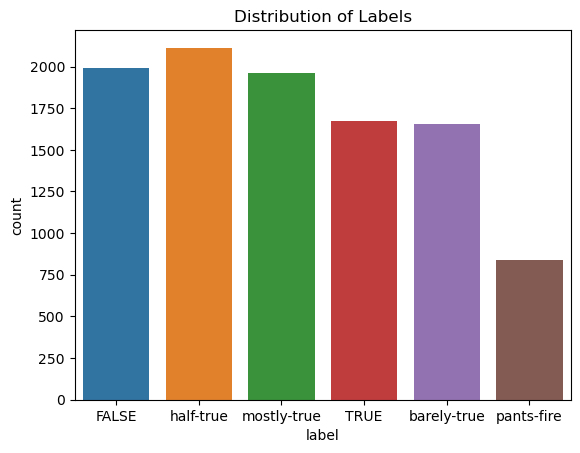

In [5]:
# Check the structure and basic statistics of the dataset
df.head()
df.info()
df.describe()

# Check the distribution of the target variable
sns.countplot(df['label'])
plt.title('Distribution of Labels')
plt.show()

#### Data Cleaning and Preprocessing

In [26]:
# Fill missing values, if any
df = df.fillna('')

# Perform text cleaning and preprocessing (e.g., removing special characters, converting to lowercase)
import re

def preprocess_text(text):
    # Remove special characters and symbols
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove extra whitespaces
    text = re.sub(r"\s+", " ", text)
    
    # Other preprocessing steps (if any)
    
    return text


df['statement'] = df['statement'].apply(preprocess_text)

# Split the dataset into train and test sets
X = df['statement']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Feature Extraction

In [18]:
#Perform text vectorization:
# Convert text data to numerical features using TF-IDF vectorization

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

#### Model Training and Evaluation

In [8]:
#Create and train the Random Forest model:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
#Make predictions on the testing set:
y_pred = rf_model.predict(X_test)

In [10]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       FALSE       0.26      0.45      0.33       391
        TRUE       0.26      0.14      0.18       351
 barely-true       0.27      0.12      0.17       352
   half-true       0.25      0.31      0.28       435
 mostly-true       0.25      0.31      0.28       370
  pants-fire       0.56      0.07      0.12       149

    accuracy                           0.26      2048
   macro avg       0.31      0.23      0.23      2048
weighted avg       0.28      0.26      0.24      2048

Accuracy: 0.25927734375


#### Model Deployment


In [11]:
# Save the trained model for future use
# Train your Random Forest classifier and assign it to rf_classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to your training data
rf_classifier.fit(X_train, y_train)

# Save the trained model for future use
joblib.dump(rf_classifier, 'random_forest_model.pkl')

['random_forest_model.pkl']

#### Bar Plot: Visualize the distribution of sentiments in the dataset.

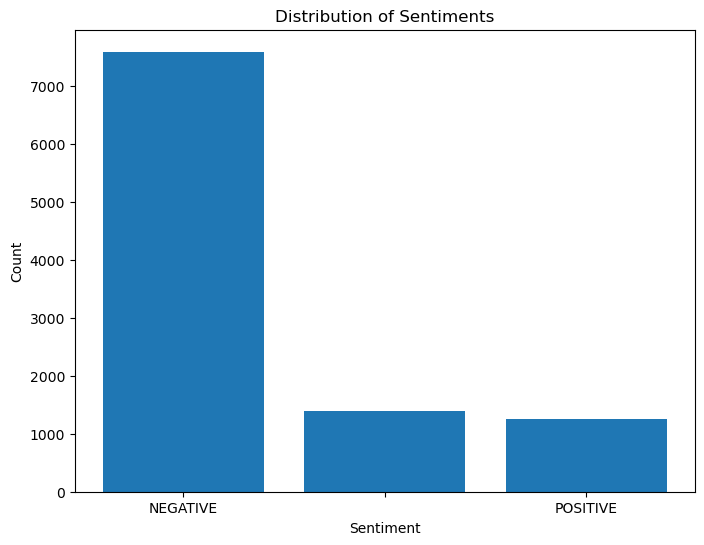

In [12]:
# Count the number of occurrences for each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

#### Confusion Matrix: Evaluate the performance of the sentiment classification model.

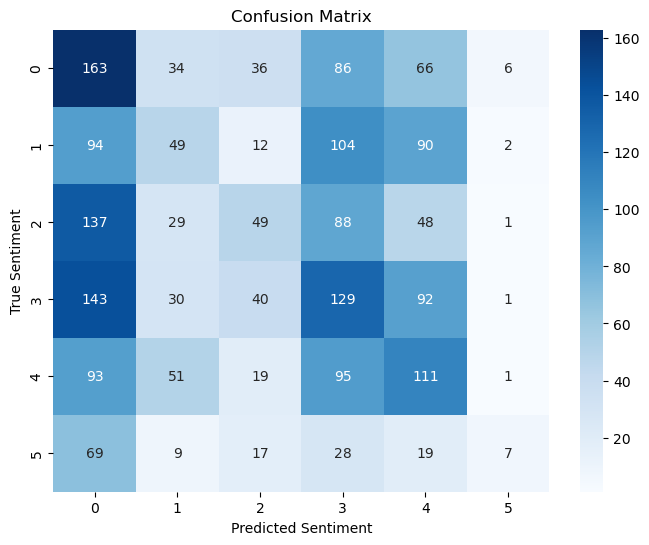

In [13]:
# Predict sentiments using the trained model
y_pred = rf_classifier.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Confusion Matrix')
plt.show()


#### Heatmap: Visualize the correlation between different sentiment categories

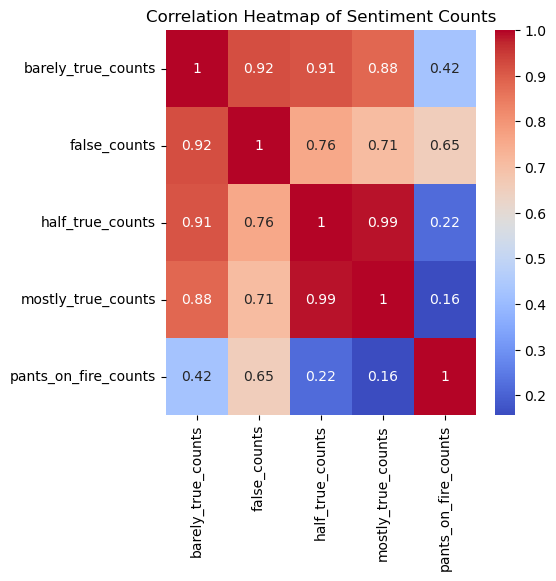

In [14]:
# Compute the correlation matrix
corr_matrix = df[['barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Sentiment Counts')
plt.show()


#### Stacked Bar Plot: Compare the distribution of sentiments across different categories.

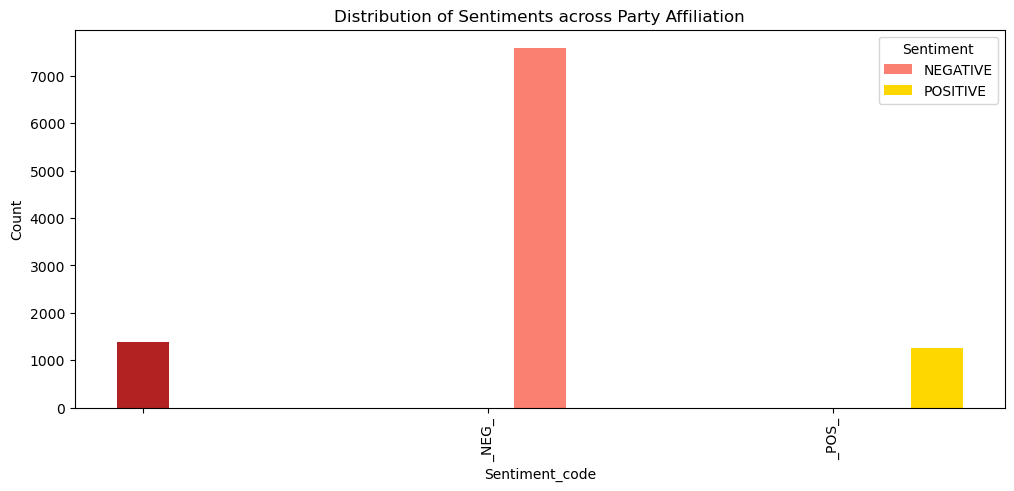

In [23]:
# Group the dataset by party sentiment_code and sentiment
grouped_data = df.groupby(['sentiment_code', 'sentiment']).size().unstack()

# Create a stacked bar plot
labels = grouped_data.index
x = np.arange(len(labels))
width = 0.15

plt.figure(figsize=(12, 6))
colors = ['firebrick', 'salmon', 'gold', 'limegreen', 'darkgreen']
sentiments = grouped_data.columns

for i, sentiment in enumerate(sentiments):
    plt.bar(x + (i * width), grouped_data[sentiment], width, label=sentiment, color=colors[i])

plt.xlabel('Sentiment_code')
plt.ylabel('Count')
plt.title('Distribution of Sentiments across Party Affiliation')
plt.xticks(x, labels, rotation='vertical')  # Rotate the x-axis labels
plt.subplots_adjust(bottom=0.25)  # Adjust the bottom spacing to avoid overlapping labels
plt.legend(title='Sentiment')
plt.show()

#### Pie Chart: Show the proportion of each sentiment category in the dataset.

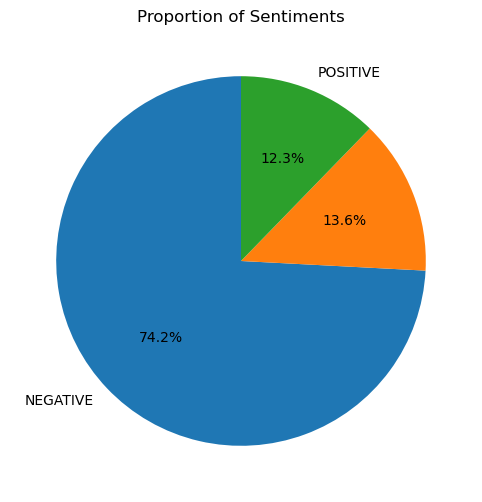

In [16]:
# Count the number of occurrences for each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Sentiments')
plt.show()